In [62]:
import torch

In [63]:
import torch.nn as nn

In [64]:
import torchvision

In [65]:
import torchvision.transforms as transform

In [66]:
import matplotlib.pyplot as plt

In [67]:
#device config
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [68]:
# Hyper parameters
input_size = 784
hidden_size = 100
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.01

In [69]:
#Load MNIST Data
train_data = torchvision.datasets.MNIST(root='./Downloads',train = True,transform=transform.ToTensor())

In [70]:
test_data = torchvision.datasets.MNIST(root='./Downloads',train = False,transform=transform.ToTensor())

In [71]:
train_loader = torch.utils.data.DataLoader(dataset=train_data,batch_size=batch_size,shuffle=True)

In [72]:
test_loader = torch.utils.data.DataLoader(dataset=test_data,batch_size=batch_size,shuffle=False)

In [73]:
examples = iter(train_loader)
samples, labels = examples.next()
print(samples.shape, labels.shape)

torch.Size([100, 1, 28, 28]) torch.Size([100])


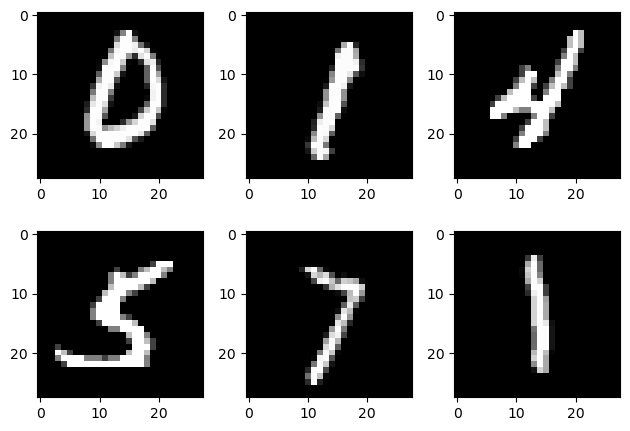

In [74]:
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(samples[i][0],cmap='gray')
    plt.tight_layout()
plt.show()

In [75]:
#Create MUltiNeural Network

class NeuralNet(nn.Module):
    def __init__(self,input_size,hidden_size,num_classes):
        super(NeuralNet,self).__init__()
        self.l1 = nn.Linear(input_size,hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size,num_classes)
    def forward(self,x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        return out
model = NeuralNet(input_size,hidden_size,num_classes)

In [76]:
# Loss and ooptimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)

In [77]:
#Training loop

n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i,(images,labels) in enumerate(train_loader):
        #Reshape Image in 150,784
        images = images.reshape(-1,28*28).to(device)
        labels = labels.to(device)
        #Forward Pass
        outputs = model(images)
        loss = criterion(outputs,labels)
        #Backward Loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if (i+1)%10==0:
            print(f'epoch {epoch+1}/{num_epochs}, step {i+1}/{n_total_steps},loss = {loss.item():.4f}')

epoch 1/2, step 10/600,loss = 0.6638
epoch 1/2, step 20/600,loss = 0.4972
epoch 1/2, step 30/600,loss = 0.5627
epoch 1/2, step 40/600,loss = 0.5272
epoch 1/2, step 50/600,loss = 0.5516
epoch 1/2, step 60/600,loss = 0.4370
epoch 1/2, step 70/600,loss = 0.2509
epoch 1/2, step 80/600,loss = 0.3937
epoch 1/2, step 90/600,loss = 0.3146
epoch 1/2, step 100/600,loss = 0.4141
epoch 1/2, step 110/600,loss = 0.1926
epoch 1/2, step 120/600,loss = 0.2797
epoch 1/2, step 130/600,loss = 0.1513
epoch 1/2, step 140/600,loss = 0.2955
epoch 1/2, step 150/600,loss = 0.2037
epoch 1/2, step 160/600,loss = 0.1649
epoch 1/2, step 170/600,loss = 0.2724
epoch 1/2, step 180/600,loss = 0.1704
epoch 1/2, step 190/600,loss = 0.1992
epoch 1/2, step 200/600,loss = 0.2016
epoch 1/2, step 210/600,loss = 0.2886
epoch 1/2, step 220/600,loss = 0.2114
epoch 1/2, step 230/600,loss = 0.1640
epoch 1/2, step 240/600,loss = 0.2848
epoch 1/2, step 250/600,loss = 0.1914
epoch 1/2, step 260/600,loss = 0.1586
epoch 1/2, step 270/6

In [111]:
# Testing 

with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1,28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predictions = torch.max(outputs,1)
        n_samples += labels.shape[0]
        n_correct += (predictions==labels).sum().item()
    acc = 100.0*n_correct/n_samples
    print(f'accuracy {acc:.2f}')

accuracy 96.93
